<a href="https://colab.research.google.com/github/AKR211/IntroCMP/blob/main/Assgn2_2111010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Hamiltonian(G,q,bril,*V):
    diagonal = np.array([(q*np.pi/G + i*np.pi)**2 for i in range(len(V),-1,-1)] + [(q*np.pi/G - i*np.pi)**2 for i in range(1,len(V)+1)])/25
    M = np.diag(diagonal)
    for j,Vi in enumerate(V):
      for i in range(2*len(V)-j):
        M[i,i+j+1] = Vi/2
        M[i+j+1,i] = Vi/2
    return np.kron(np.eye(bril),M)


def ploot(G,bril,*V):
  points = [np.linalg.eig(Hamiltonian(G,q,bril,*V))[0].real for q in range(-(bril//2 + 1)*G//2,(bril//2 + 1)*(G-G//2))]
  En = []
  plt.figure(figsize=(12,4.5))
  plt.subplot(1, 2, 1)
  for i in range((2*len(V)+1)*bril):
      plt.plot(range(-(bril//2 + 1)*G//2,(bril//2 + 1)*(G-G//2)), np.array(points).T[i], 'r.') #-G//2,bril*G-G//2
      En += np.array(points).T[i].tolist()

  plt.xlabel('q')
  plt.ylabel('Energy')
  plt.title('Band structure')

  plt.subplot(1, 2, 2)
  plt.hist(En, bins=100, density=True)
  plt.title('Density of states')
  plt.xlabel('Energy')
  plt.ylabel('Density')
  plt.show()


In [ ]:
G=100

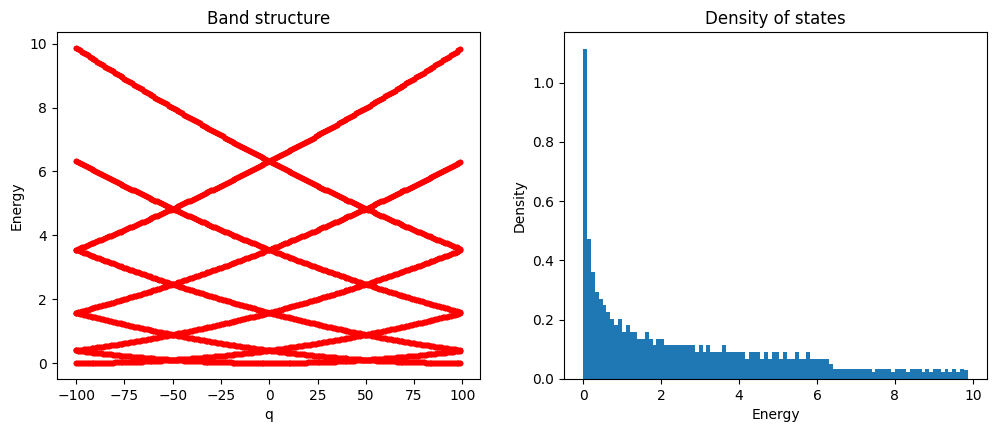

In [ ]:
ploot(G,3,0.,0.,0.,0.)
#free electron model V=0

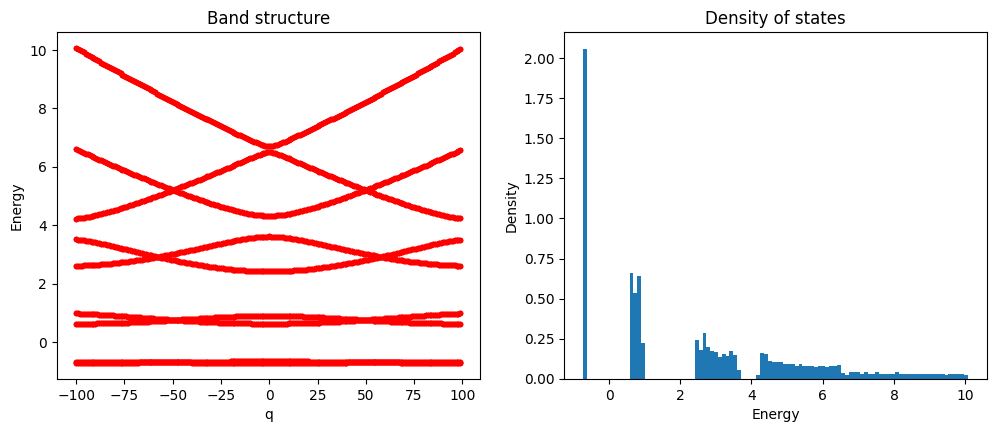

In [ ]:
ploot(G,3,0.,2.,0.,1.)
# V1=2 V2=1

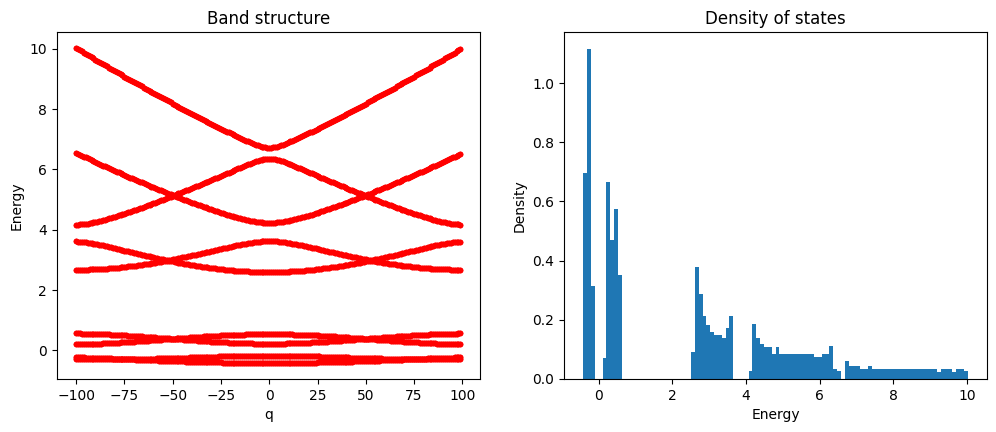

In [ ]:
ploot(G,3,0.,1.,0.,2.)
# V1=1 V2=2

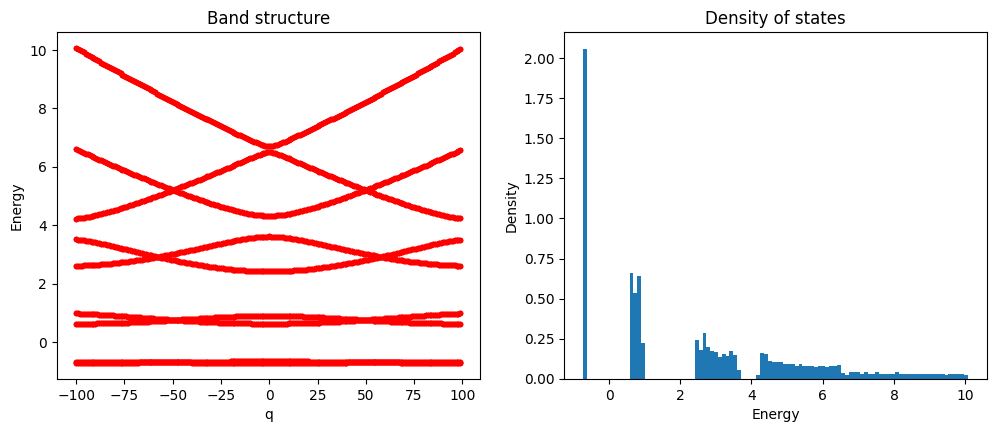

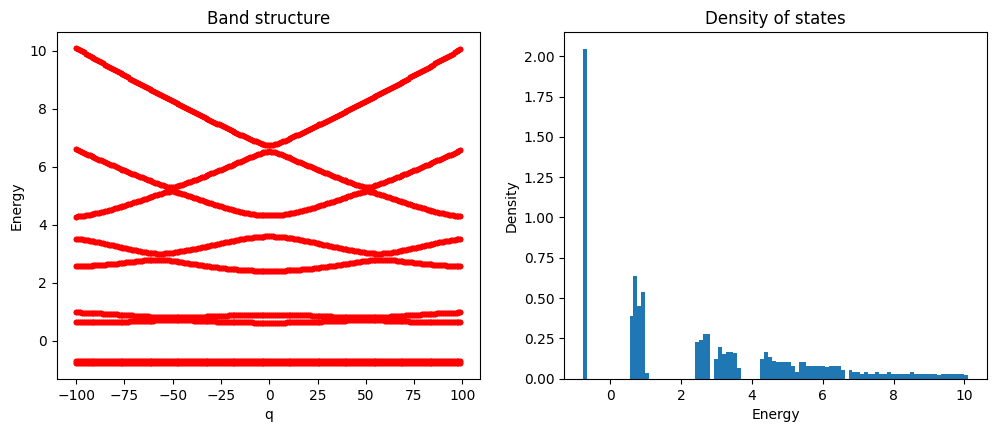

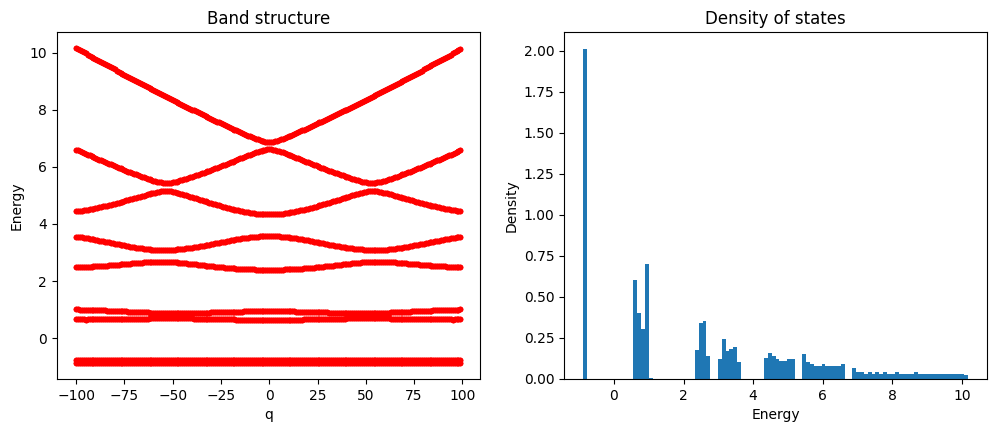

In [ ]:
# V1=2 V2=1
ploot(100,3,0.,2.,0.,1.) #V0=0
ploot(100,3,0.5,2.,0.,1.) #V0=0.5
ploot(100,3,1.,2.,0.,1.) #V0=1